# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [49]:
#libraries
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [10]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

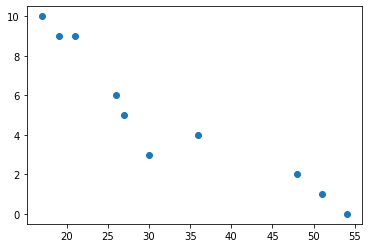

In [12]:
# Your code here.
plt.scatter(student_data["Age"],student_data["Tardies"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

#### >> Comment 
There seems to be a negative correlation between Age and Tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [25]:
# Your response here.
#correlation:
print("correlation:",student_data["Age"].corr(student_data["Tardies"]))

#covariance:
print("covariance:",np.cov(student_data["Age"],student_data["Tardies"])[0][1])

#The covarience tell us that Age and Tardies have a negative relationship (so on average when Age increases Tardies decreases) and the correlation tells us that and that the relationship is strong.

correlation: -0.9391626886887122
covariance: -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [30]:
# Your response here.
stats.linregress(student_data["Age"],student_data["Tardies"])

#linear regression:  Tardies = -0.24*student_data["Age"] + 12.89

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)

Plot your regression model on your scatter plot.

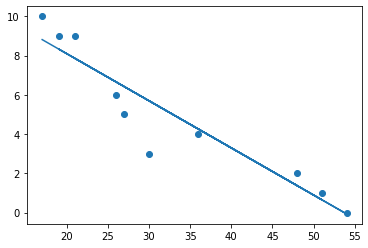

In [31]:
# Your code here.
plt.scatter(student_data["Age"],student_data["Tardies"])
plt.plot(student_data["Age"],-0.24*student_data["Age"] + 12.89)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [34]:
# Your response here. 
print("It's seems the hypothesis of 'the younger the students are, the more often they are late to class' was correct, which is proven by the facct that we noticed a negative correlation betwen both variables of",student_data["Age"].corr(student_data["Tardies"]), "and supported by the fact that our linear regression has a R^2 of",stats.linregress(student_data["Age"],student_data["Tardies"])[2]**2,"meaning that on average",stats.linregress(student_data["Age"],student_data["Tardies"])[2]**2*100," percent of the points are explained by the regression")

It's seems the hypothesis of 'the younger the students are, the more often they are late to class' was correct, which is proven by the facct that we noticed a negative correlation betwen both variables of -0.9391626886887122 and supported by the fact that our linear regression has a R^2 of 0.8820265558250108 meaning that on average 88.20265558250108  percent of the points are explained by the regression


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [122]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles.head(1)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [89]:
# Your response here. 
hypothesis = vehicles.filter(["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"])
hypothesis.corr()
# The most important would be Fuel Barrels/Year. The least important would be Combined MPG or Fuel Cost/Year as though they have high correlation with output they also have high correlation with the other x-variables so they won't bring valuable information if we were to use also as an x-varibale the Fuel Barrels/Year. However if we are talking of using only one variable the Year is the worst due to low correlation.

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


##### > Fitting one variable 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

LinregressResult(slope=26.28362539747027, intercept=12.486520830757058, rvalue=0.9861886621428729, pvalue=0.0, stderr=0.023281123789227337)


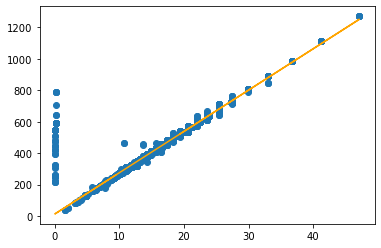

In [85]:
# Simple model with just one variable (the one with highest correlation) - leaving outliers
x = hypothesis[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = hypothesis["CO2 Emission Grams/Mile"]
plt.scatter(x["Fuel Barrels/Year"],y)
reg_1 = stats.linregress(x["Fuel Barrels/Year"],y)
plt.plot(x["Fuel Barrels/Year"], reg_1[0]*x["Fuel Barrels/Year"]+reg_1[1], c = 'orange')
print(reg_1)

LinregressResult(slope=26.943570316616327, intercept=0.11178074912891134, rvalue=0.9996172010177026, pvalue=0.0, stderr=0.003936348247258777)


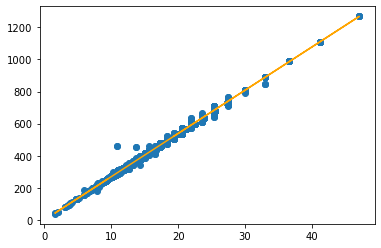

In [108]:
# Simple model with just one variable (the one with highest correlation) - taking out outliers
hypothesis_2 = hypothesis[hypothesis["Fuel Barrels/Year"] > 0.207]
x = hypothesis_2[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = hypothesis_2["CO2 Emission Grams/Mile"]
plt.scatter(x["Fuel Barrels/Year"],y)
reg_1 = stats.linregress(x["Fuel Barrels/Year"],y)
plt.plot(x["Fuel Barrels/Year"], reg_1[0]*x["Fuel Barrels/Year"]+reg_1[1], c = 'orange')
print(reg_1)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [127]:
# Your response here. 
x = hypothesis[ "Fuel Barrels/Year"]
y = hypothesis["CO2 Emission Grams/Mile"]
model = sm.OLS(y,x).fit()
model.summary()
#Eliminating the extra variables and see what is the best fit for each variable (e.g: quadratic,linear,..) is out of scope

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.998
Model:                                 OLS   Adj. R-squared (uncentered):              0.998
Method:                      Least Squares   F-statistic:                          2.164e+07
Date:                     Thu, 23 Jul 2020   Prob (F-statistic):                        0.00
Time:                             18:00:41   Log-Likelihood:                     -1.5864e+05
No. Observations:                    35952   AIC:                                  3.173e+05
Df Residuals:                        35951   BIC:                                  3.173e+05
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    26.9498      0.006   4651.565      0.000      26.938      26.961
==============================================================================
Omnibus:                    89555.105   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1022572329.320
Skew:                          27.472   Prob(JB):                         0.00
Kurtosis:                     827.382   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### > Fitting multiple variable 

In [126]:
x = hypothesis[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = hypothesis["CO2 Emission Grams/Mile"]
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Thu, 23 Jul 2020   Prob (F-statistic):                        0.00
Time:                             18:00:14   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [118]:
# Your code here.
party_data = pd.DataFrame({'invited': [1,3,4,6,8,9,11,14], 'available': [1,2,4,4,5,7,8,13]})
party_data["unavailable"] = party_data["invited"] - party_data["available"]

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

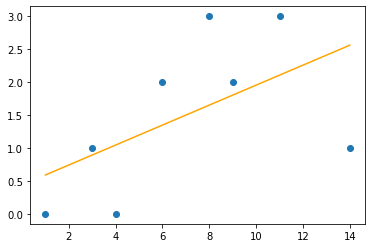

In [119]:
# Your code here.
reg1 = stats.linregress(party_data["invited"],party_data["unavailable"])
plt.scatter(party_data["invited"],party_data["unavailable"])
plt.plot(party_data["invited"], reg1[0]*party_data["invited"]+reg1[1], c = 'orange')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [71]:
# Your response here. 
#The plot hints at a possible positive linear correlation between both variables
reg1

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090685, stderr=0.09380896778286217)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031292)


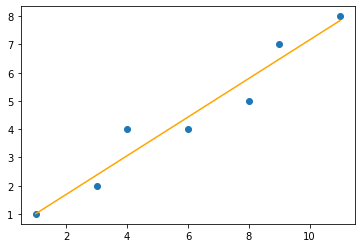

In [120]:
# The point (14,13) seems to be a problematic one
hypothesis_party = pd.DataFrame({'invited': [1,3,4,6,8,9,11], 'unavailable': [1,2,4,4,5,7,8]})
party_data["unavailable"] = party_data["invited"] - party_data["available"]
plt.scatter(hypothesis_party["invited"],hypothesis_party["unavailable"])
plt.plot(hypothesis_party["invited"], reg2[0]*hypothesis_party["invited"]+reg2[1], c = 'orange')
reg2 = stats.linregress(hypothesis_party["invited"],hypothesis_party["unavailable"])
print(reg2)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

# Response:

The slope became smaller, meaning that according to the regression an increase in invited people will on averege lead to a smaller increase in pople unable to go (=0,684). The intercept also changed, but the information alone in itself holds no meaning (as 0 invited people can in reality only lead to 0 unable to go). More importantly the correlation (rvalue) became larger, and as result (as both rvalues are posite) we know that the r^2 is larger and therefor the fit of the regression  is better. Nevertheless eliminating tha value we did has big implications given that the dataset is really small, and so taking out a point, meas losing a big percentage of the data available.